## Unstable
Solving the Initial Value Problem 
$$ y^{'}=-0.5y \ \ y(0)=3 \ \ \  0\leq t \leq 10 $$

Using a weakly stable method
$$ w_{i+1}=w_{i}+\frac{h}{2}[3(0.5w_{i})-(0.5w_{i-1})] $$
Using an two different unstable method
$$ w_{i+1}=1.0001w_{i}+\frac{h}{2}[2f(t_i,w_{i})-f(t_{i-1},w_{i-1})+f(t_{i-2},w_{i-2})] $$
$$ w_{i+1}=1.5w_{i}+\frac{4h}{3}[2f(t_i,w_{i})-f(t_{i-1},w_{i-1})+f(t_{i-2},w_{i-2})] $$


In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")

In [2]:
tau=-0.5
N=10000
h=1/N

time=np.linspace(0,1,N)

Numerical_Solution=np.zeros(N)
Numerical_Solution1=np.zeros(N)
Numerical_Solution2=np.zeros(N)

x=np.zeros(N)
# Initial Conditions
Numerical_Solution[0]=1
Numerical_Solution1[0]=1
Numerical_Solution2[0]=1
x[0]=0

In [3]:
# INTIAL SOLUTIONS ONE STEP METHOD
for i in range (1,4):
    Numerical_Solution[i]=Numerical_Solution[i-1]+h*tau*(Numerical_Solution[i-1]*Numerical_Solution[i-1])
    Numerical_Solution1[i]=Numerical_Solution[i]#+h*tau*(-Numerical_Solution[i-1]*Numerical_Solution[i-1])
    Numerical_Solution2[i]=Numerical_Solution[i]#+h*tau*(-Numerical_Solution[i-1]*Numerical_Solution[i-1])
    

# MULTISTEP METHODS
for i in range (4,N):
    Numerical_Solution[i]=1*Numerical_Solution[i-4]+4*h/3*tau*(2*Numerical_Solution[i-1]*Numerical_Solution[i-1]
                                                               -Numerical_Solution[i-2]*Numerical_Solution[i-2]
                                                               +Numerical_Solution[i-3]*Numerical_Solution[i-3])
    Numerical_Solution1[i]=1.001*Numerical_Solution1[i-4]+4*h/3*tau*(2*Numerical_Solution1[i-1]*Numerical_Solution1[i-1]
                                                                     -Numerical_Solution1[i-2]*Numerical_Solution1[i-2]
                                                                     +Numerical_Solution1[i-3]*Numerical_Solution1[i-3])
    Numerical_Solution2[i]=1.5*Numerical_Solution2[i-4]+4*h/3*tau*(2*Numerical_Solution2[i-1]*Numerical_Solution2[i-1]
                                                                   -Numerical_Solution2[i-2]*Numerical_Solution2[i-2]
                                                                   +Numerical_Solution2[i-3]*Numerical_Solution2[i-3])

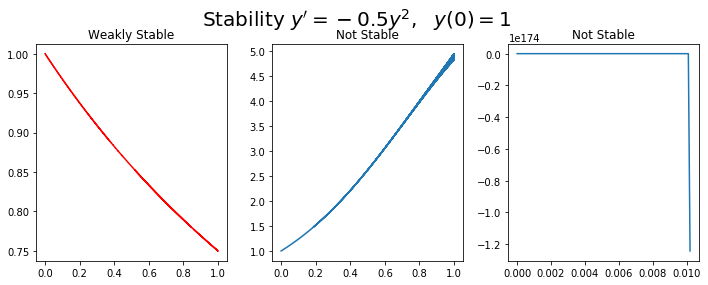

In [4]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(time,Numerical_Solution,color='red')
#ax.legend(loc='best')
plt.title('Weakly Stable')
ax = fig.add_subplot(1,3,2)
plt.plot(time,Numerical_Solution1)
plt.title('Not Stable')
ax = fig.add_subplot(1,3,3)
plt.plot(time,Numerical_Solution2)
plt.title('Not Stable')
fig.suptitle(r"Stability $y'=-0.5y^2, \ \  y(0)=1$", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)